In [2]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
# You might need to install the package:
# $pip install seaborn

In [4]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import statsmodels.formula.api as sm

Read File

In [6]:
data = pd.read_csv('Lead_Verify_Response.csv')

In [7]:
fields = list(data.columns.values)
print(fields)

['ORDER', 'First Name', 'Last Name', 'Mailing Street', 'Mailing City', 'Mailing State', 'Mailing Zip', 'Phone', 'Phone to Name', 'Phone Is Valid', 'Phone Line Type', 'Phone Is Prepaid', 'Phone Is Commercial', 'Address to Name', 'Address Is Valid', 'Address Type', 'Address Is Active', 'Address Is Commercial', 'Call Disposition']


Data Analysis 

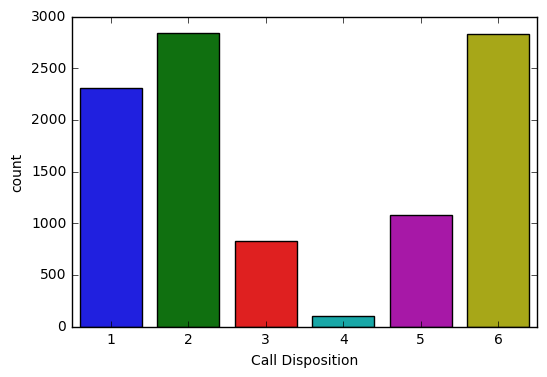

In [8]:
sns.countplot(x="Call Disposition", data=data);
plt.show()

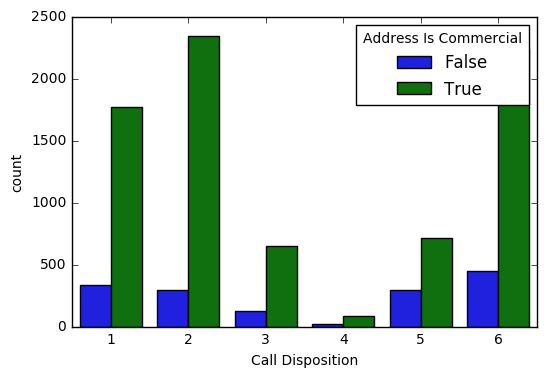

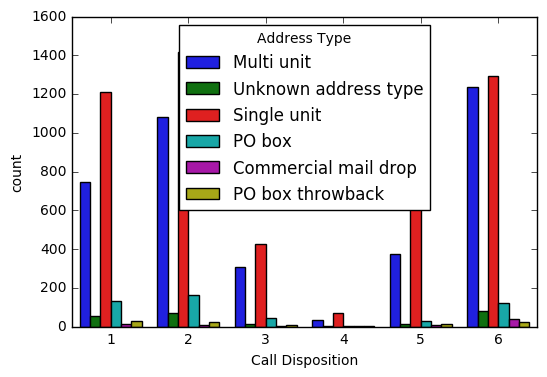

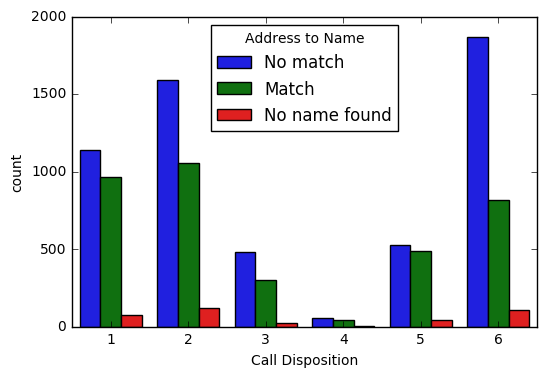

In [9]:
sns.countplot(x="Call Disposition", hue='Address Is Commercial', data=data);
plt.show()
sns.countplot(x="Call Disposition", hue='Address Type', data=data);
plt.show()
sns.countplot(x="Call Disposition", hue='Address to Name', data=data);
plt.show()

In [10]:
categorical = fields[8:]
categorical

['Phone to Name',
 'Phone Is Valid',
 'Phone Line Type',
 'Phone Is Prepaid',
 'Phone Is Commercial',
 'Address to Name',
 'Address Is Valid',
 'Address Type',
 'Address Is Active',
 'Address Is Commercial',
 'Call Disposition']

In [11]:
data = shuffle(data)

In [12]:
data_ind = data[categorical]
data_ind = pd.get_dummies(data_ind, categorical[:-1])

In [13]:
n = len(data_ind) //10*8
data_ind, test = data_ind[:n], data_ind[n:] 

In [14]:
columns = data_ind.columns.values
columns

array(['Call Disposition', 'Phone to Name_Match', 'Phone to Name_No match',
       'Phone to Name_No name found', 'Phone Is Valid_False',
       'Phone Is Valid_True', 'Phone Line Type_Fixed VOIP',
       'Phone Line Type_Landline', 'Phone Line Type_Mobile',
       'Phone Line Type_Non-fixed VOIP', 'Phone Line Type_Tollfree',
       'Phone Is Prepaid_False', 'Phone Is Prepaid_True',
       'Phone Is Commercial_False', 'Phone Is Commercial_True',
       'Address to Name_Match', 'Address to Name_No match',
       'Address to Name_No name found', 'Address Is Valid_False',
       'Address Is Valid_True', 'Address Type_Commercial mail drop',
       'Address Type_Multi unit', 'Address Type_PO box',
       'Address Type_PO box throwback', 'Address Type_Single unit',
       'Address Type_Unknown address type', 'Address Is Active_False',
       'Address Is Active_True', 'Address Is Commercial_False',
       'Address Is Commercial_True'], dtype=object)

In [15]:
for i in range(len(columns)):
    columns[i] = columns[i].replace(' ','_')
    columns[i] = columns[i].replace('-','_')
columns

array(['Call_Disposition', 'Phone_to_Name_Match', 'Phone_to_Name_No_match',
       'Phone_to_Name_No_name_found', 'Phone_Is_Valid_False',
       'Phone_Is_Valid_True', 'Phone_Line_Type_Fixed_VOIP',
       'Phone_Line_Type_Landline', 'Phone_Line_Type_Mobile',
       'Phone_Line_Type_Non_fixed_VOIP', 'Phone_Line_Type_Tollfree',
       'Phone_Is_Prepaid_False', 'Phone_Is_Prepaid_True',
       'Phone_Is_Commercial_False', 'Phone_Is_Commercial_True',
       'Address_to_Name_Match', 'Address_to_Name_No_match',
       'Address_to_Name_No_name_found', 'Address_Is_Valid_False',
       'Address_Is_Valid_True', 'Address_Type_Commercial_mail_drop',
       'Address_Type_Multi_unit', 'Address_Type_PO_box',
       'Address_Type_PO_box_throwback', 'Address_Type_Single_unit',
       'Address_Type_Unknown_address_type', 'Address_Is_Active_False',
       'Address_Is_Active_True', 'Address_Is_Commercial_False',
       'Address_Is_Commercial_True'], dtype=object)

In [16]:
data_ind.columns = columns

In [17]:
regr = sm.ols(formula="Call_Disposition ~ " + ' + '.join(columns[1:]), data=data_ind)
result = regr.fit()

In [18]:
result.params

Intercept                            2.000000
Phone_to_Name_Match                 -0.762791
Phone_to_Name_No_match               0.465484
Phone_to_Name_No_name_found          0.322342
Phone_Is_Valid_False                -0.911972
Phone_Is_Valid_True                  0.025035
Phone_Line_Type_Fixed_VOIP          -0.124551
Phone_Line_Type_Landline             0.272759
Phone_Line_Type_Mobile              -0.450128
Phone_Line_Type_Non_fixed_VOIP       0.057810
Phone_Line_Type_Tollfree             0.269145
Phone_Is_Prepaid_False              -0.069885
Phone_Is_Prepaid_True                0.489180
Phone_Is_Commercial_False            0.219386
Phone_Is_Commercial_True            -0.516693
Address_to_Name_Match               -1.057173
Address_to_Name_No_match            -1.252001
Address_to_Name_No_name_found        1.551448
Address_Is_Valid_False               1.787548
Address_Is_Valid_True                0.140625
Address_Type_Commercial_mail_drop    0.605460
Address_Type_Multi_unit           

In [19]:
result.predict(test)

array([ 3.43536386,  2.9180191 ,  2.06212472, ...,  3.35294576,
        4.21869279,  4.08487871])

In [20]:
def run_regr(data, columns, Y):
    data = shuffle(data)
    data_ind = data[[Y] + columns]
    data_ind = pd.get_dummies(data_ind, columns)
    
    # clear colunm names for regrssion 
    # (space and - not supported)
    columns_ind = data_ind.columns.values
    for i in range(len(columns_ind)):
        columns_ind[i] = columns_ind[i].replace(' ','_')
        columns_ind[i] = columns_ind[i].replace('-','_')
    data_ind.columns = columns_ind
    
    # Split to train & test 
    n = len(data_ind) //10*8
    train, test = data_ind[:n], data_ind[n:]
    
    regr = sm.ols(formula=columns_ind[0] + ' ~ ' + ' + '.join(columns_ind[1:]), data=train)
    result = regr.fit()
    
    pred = result.predict(test)
    actual = test[columns_ind[0]]
    
    #calculate error
    result = sum(abs(actual - pred))
    return result / len(test)

In [21]:
categorical = fields[8:]

In [22]:
results = []
columns = []
for i in range(len(categorical)-1):
    min_err = float("inf")
    for cat in categorical[:-1]:
        if cat not in columns:
            res = run_regr(data, columns + [cat], categorical[-1])
            if res < min_err:
                c = cat
                min_err = res
    columns.append(c)
    results.append([columns.copy(), min_err])

In [23]:
run_regr(data, categorical[:-1], categorical[-1])

1.7074503249912167

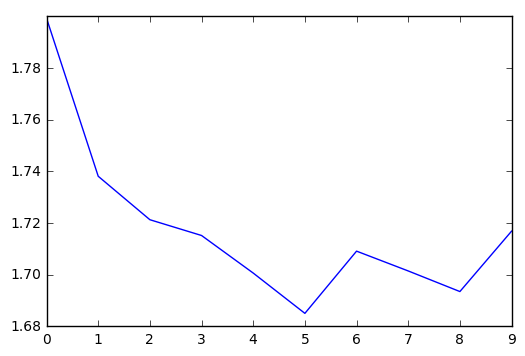

In [24]:
numbers = [x[1] for x in results]
plt.plot(numbers)
plt.show()

In [25]:
results

[[['Phone to Name'], 1.7992792142100904],
 [['Phone to Name', 'Phone Is Commercial'], 1.7381339049737838],
 [['Phone to Name', 'Phone Is Commercial', 'Phone Line Type'],
  1.7213123292010772],
 [['Phone to Name',
   'Phone Is Commercial',
   'Phone Line Type',
   'Phone Is Valid'],
  1.7152050827855299],
 [['Phone to Name',
   'Phone Is Commercial',
   'Phone Line Type',
   'Phone Is Valid',
   'Address Type'],
  1.7006619178689903],
 [['Phone to Name',
   'Phone Is Commercial',
   'Phone Line Type',
   'Phone Is Valid',
   'Address Type',
   'Address to Name'],
  1.6850662777529726],
 [['Phone to Name',
   'Phone Is Commercial',
   'Phone Line Type',
   'Phone Is Valid',
   'Address Type',
   'Address to Name',
   'Phone Is Prepaid'],
  1.709148948826146],
 [['Phone to Name',
   'Phone Is Commercial',
   'Phone Line Type',
   'Phone Is Valid',
   'Address Type',
   'Address to Name',
   'Phone Is Prepaid',
   'Address Is Commercial'],
  1.7014819425170251],
 [['Phone to Name',
   'Pho

In [26]:
seen = set()
results = []
for i in range(len(categorical)-1):
    for j in range(i, len(categorical)-1):
        res = run_regr(data, categorical[i:j], categorical[-1])
        if res > min_err:
            c = columns[j]
            min_err = res
    columns.remove(c)
    results.append([columns.copy(), min_err])

PatsyError: expected a noun, but instead the expression ended
    Call_Disposition ~
                     ^

In [29]:
def run_regr(data, columns, Y):
    data = shuffle(data)
    data_ind = data[[Y] + columns]
    data_ind = pd.get_dummies(data_ind, columns)
    
    # clear colunm names for regrssion 
    # (space and - not supported)
    columns_ind = data_ind.columns.values
    for i in range(len(columns_ind)):
        columns_ind[i] = columns_ind[i].replace(' ','_')
        columns_ind[i] = columns_ind[i].replace('-','_')
    data_ind.columns = columns_ind
    
    # Split to train & test 
    n = len(data_ind) //10*8
    train, test = data_ind[:n], data_ind[n:]
    
    regr = sm.ols(formula=columns_ind[0] + ' ~ ' + ' + '.join(columns_ind[1:]), data=train)
    result = regr.fit()
    
    pred = result.predict(test)
    actual = test[columns_ind[0]]
    print(actual - pred)
    #calculate error
    result = sum(abs(actual - pred))
    return result / len(test)

In [30]:
run_regr(data, categorical[:-1], categorical[-1])

5711    2.461617
2762   -1.884951
9112   -0.632834
6163   -1.699041
622    -1.552519
8280   -0.175424
2450    2.756252
1499    2.430700
8033   -2.320162
8173    1.563097
7571   -1.454662
7244    2.417380
1022   -2.320162
7288    1.555286
3787   -1.355408
3759    2.461617
1445   -0.454662
3920   -0.543055
2712    1.644592
9453   -2.257550
1634    0.281633
8194   -1.552519
6230   -0.697258
2853   -1.119096
8964    2.209074
9846   -0.915478
6812    1.921711
3487   -0.632834
2900    1.084522
6073   -1.547374
          ...   
1794    2.417380
9321   -1.787521
5708   -2.869076
8938    0.822986
5787   -0.175424
7248   -1.582620
1706    1.571917
6128   -1.799918
2463   -1.757420
7358   -0.201204
5540   -2.058627
4767   -1.196059
4211   -0.641826
4873    1.302742
9093   -1.915478
1666   -1.132777
2269    1.284580
5934   -1.538383
6637    3.575438
6150   -1.123708
8593   -1.825745
3190   -1.552519
1531   -0.582620
5284   -1.492886
2858    2.417380
6140    0.423393
7144   -2.852084
6299   -1.2055

1.7118529075973827